# ParseGA
### Created on Tue Apr 28 2020 by Nicola
### Ammended for patient data on Apr 9 2024 by Anita
Parse GA output data and export as csv. 
- Select GA.csv files
- Select output directory

In [59]:
from pathlib import PurePath
import os
import numpy as np
import csv
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [16]:
#inspect files for duplicates / incomplete trials
data_dir = os.getcwd() + '/raw_data'
file_list = os.listdir(data_dir)

file_list.remove('.DS_Store')
file_list.remove('.ipynb_checkpoints')
len(file_list)

130

In [17]:
import re

r = re.compile(".*2.csv")
file_list_dup = list(filter(r.match, file_list))
file_list_dup

['S1PT04_Fearful_output_2.csv',
 'S1HC27_Angry_output_2.csv',
 'S1PT05_Fearful_output_2.csv']

In [18]:
r = re.compile("S1PT15")
file_list_miss = list(filter(r.match, file_list))
file_list_miss

['S1PT15_Happy_output_1.csv', 'S1PT15_Angry_output_1.csv']

In [19]:
rm_list = [re.sub('output_2', 'output_1', i) for i in file_list_dup + file_list_miss]
rm_list

['S1PT04_Fearful_output_1.csv',
 'S1HC27_Angry_output_1.csv',
 'S1PT05_Fearful_output_1.csv',
 'S1PT15_Happy_output_1.csv',
 'S1PT15_Angry_output_1.csv']

In [21]:
file_list.remove(rm_list[1])
file_list.remove(rm_list[2])
file_list.remove(rm_list[3])
file_list.remove(rm_list[4])
len(file_list)

126

In [9]:
filename = [data_dir+"/"+filename for filename in file_list]
outputDir = os.getcwd() + '/parsed'
len(filename)

126

In [533]:
for file in filename:

    # set path
    path = PurePath(file)
    
    # read data - can't do this easily with pandas, so reading line by line from the csv
    print('Reading file:')
    print(path)
    
    data=[]
    with open(file, 'r') as f:
        reader=csv.reader(f)
        for row in reader:
            data.append(row)
    
    # find indices
    iGeneration=[]
    iElite=[]
    iSelected=[]
            
    nRows=len(data)
    for row in range(nRows):
        if data[row][0]=='Generation number':
            iGeneration.append(row)
        if data[row][0]=='elite face':
            iElite.append(row)
        if data[row][0]=='selected faces':
            iSelected.append(row)
            
    # constants
    nFaces=len(data[1])-2
    nFeatures=(iGeneration[2]-1) - (iGeneration[1]+3)+1
    fName=[]
    for d in range(nFeatures):
        fName.append(data[3+d][1])
    fName.extend(["faceID","faceSelected","eliteSelected","nGeneration"])
    
    # rearrange data 
    dataParsed=pd.DataFrame()
    for g in range(len(iGeneration)):
        
        # selected and elite labels   
        faceID=list(range(1,nFaces+1))
        selected=data[iSelected[g]][2:]
        elite=data[iElite[g]][2:]
        
        
        # get weights
        weights=[]
        for d in range(nFeatures):
            weights.append(data[iGeneration[g]+3+d][2:])
        
        # generation number vector
        gList=np.repeat(g+1,nFaces)
        
        # append parsed data
        df=pd.concat([pd.DataFrame(weights).T,pd.Series(faceID), pd.Series(selected), pd.Series(elite), pd.Series(gList)], axis=1)
        dataParsed=pd.concat([dataParsed, df])
        
    # export data
    dataParsed.columns = fName
    outputName=outputDir + '/' + os.path.split(file)[1].split('.')[0] + '_parsed.csv'
    dataParsed.to_csv(outputName,index=False)

Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1PT21_Fearful_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1HC22_Angry_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1HC13_Happy_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1HC05_Fearful_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1PT19_Fearful_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1PT24_Fearful_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1PT17_Angry_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1HC03_Happy_output_1.csv
Reading file:
/Users/anitasong/Desktop/Rotation_2/EmotionPerception(GA)/raw_data/S1PT13_Fearful_output_1.csv
Reading file:
/Users/anitas

In [22]:
test = pd.read_csv('parsed/S1HC02_Angry_output_1_parsed.csv')
test['nGeneration'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

# Generate subject-wise elite csv
### Created on Tue May 10 2022 by Tom

Generic script to take final generation face (elite) from parsed files, and output
into a single csv, with label for file name.

In [25]:
# Select generation N (start from 1)
nGen = 8

# Set data directory
data_dir = os.getcwd() + '/parsed'

# list of all files in directory
file_list = os.listdir(data_dir)
file_list.remove('.DS_Store')
file_list.remove('.ipynb_checkpoints')

In [35]:
# Construct dataframe
full_df = pd.DataFrame()
for file in file_list:
    # read csv
    file_df = pd.read_csv(data_dir + '//' + file)
    
    # get dataframe with single row containing elite
    elite_df = file_df[
        (file_df['eliteSelected'] == 1) & (file_df['nGeneration'] == nGen)
        ]
    
    # remove columns for face number/selection etc
    elite_df = elite_df[elite_df.columns[0:150]]
    
    # add column for file name
    elite_df.insert(150, 'file', file)
    
    # concatenate with full dataframe
    full_df = pd.concat([full_df, elite_df], ignore_index=True)

#check
full_df

,neutral,jawOpen,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,rgtUprLipSk,lftLwrLipSk,...,jawBk_rgtLwrLipSk_rgtLwrInrLipTeethClsn,jawLft_jawBk_rgtLwrLipSk_rgtLwrOutLipTeethClsn,jawOpen_lftLwrLipSk,jawOpen_lftNrwMth,jawOpen_lftUprLipSk,jawOpen_rgtLwrLipSk,jawOpen_rgtNrwMth,jawOpen_rgtUprLipSk,jawRgt_jawBk_lftLwrLipSk_lftLwrOutLipTeethClsn,file
0,0,0.000000,0.669160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC08_Angry_output_1_parsed.csv
1,0,0.000000,0.175359,0.059658,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1PT05_Fearful_output_2_parsed.csv
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1PT16_Angry_output_1_parsed.csv
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC26_Angry_output_1_parsed.csv
4,0,0.254434,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.172283,...,0.0,0.0,0.043835,0.042748,0.000000,0.043835,0.042748,0.000000,0.0,S1PT06_Happy_output_1_parsed.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0.000000,0.166751,0.000000,0.000000,0.345749,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC27_Fearful_output_1_parsed.csv
122,0,0.000000,0.016643,0.000000,0.000000,0.022218,0.0,0.000000,0.000000,0.124640,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC09_Angry_output_1_parsed.csv
123,0,0.004089,0.382275,0.000000,0.000000,0.000000,0.0,0.485709,0.485709,0.009791,...,0.0,0.0,0.000040,0.001813,0.001986,0.000040,0.001813,0.001986,0.0,S1HC11_Happy_output_1_parsed.csv
124,0,0.033928,0.000000,0.000000,0.251248,0.000000,0.0,0.405934,0.405934,0.000000,...,0.0,0.0,0.000000,0.002522,0.013772,0.000000,0.002522,0.013772,0.0,S1PT17_Angry_output_1_parsed.csv


In [36]:
# Save as csv
full_df.to_csv('processed_data/all_elites.csv', index = False)

# Code file names
### Created on Tue May 10 2022 by Tom

Script to split the file names in the generic elite csv, and add columns 
specifying ID, conditions, etc.

Note - this script currently works with the file names as output in the offline
data. Will need to amend to suit the format of the file names you use

### Ammended for patient data on 6 March 2024 by Anita

In [37]:
def get_file_info(file_name):
    ID = file_name.split('_')[0] #ID (string)
    emo = file_name.split('_')[1] #target emo
    #group = file_name.split('_')[]
    return ID, emo

In [38]:
# Get elite csv
elite_df = pd.read_csv('processed_data/all_elites.csv')

In [39]:
# loop through elites
ID_list = []
emo_list = []
for idx in elite_df.index:
    file_name = elite_df.iloc[idx]['file']
    ID, emo = get_file_info(file_name)
    emo_list.append(emo)
    ID_list.append(ID)

In [40]:
# add to dataframe
elite_df['TargetEmotion'] = emo_list
elite_df['ID'] = ID_list
elite_df['Group'] = elite_df['ID'].str.extract(r'S1([A-Z][A-Z])')

##check
elite_df

,neutral,jawOpen,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,rgtUprLipSk,lftLwrLipSk,...,jawOpen_lftNrwMth,jawOpen_lftUprLipSk,jawOpen_rgtLwrLipSk,jawOpen_rgtNrwMth,jawOpen_rgtUprLipSk,jawRgt_jawBk_lftLwrLipSk_lftLwrOutLipTeethClsn,file,TargetEmotion,ID,Group
0,0,0.000000,0.669160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC08_Angry_output_1_parsed.csv,Angry,S1HC08,HC
1,0,0.000000,0.175359,0.059658,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1PT05_Fearful_output_2_parsed.csv,Fearful,S1PT05,PT
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1PT16_Angry_output_1_parsed.csv,Angry,S1PT16,PT
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC26_Angry_output_1_parsed.csv,Angry,S1HC26,HC
4,0,0.254434,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.172283,...,0.042748,0.000000,0.043835,0.042748,0.000000,0.0,S1PT06_Happy_output_1_parsed.csv,Happy,S1PT06,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0.000000,0.166751,0.000000,0.000000,0.345749,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC27_Fearful_output_1_parsed.csv,Fearful,S1HC27,HC
122,0,0.000000,0.016643,0.000000,0.000000,0.022218,0.0,0.000000,0.000000,0.124640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC09_Angry_output_1_parsed.csv,Angry,S1HC09,HC
123,0,0.004089,0.382275,0.000000,0.000000,0.000000,0.0,0.485709,0.485709,0.009791,...,0.001813,0.001986,0.000040,0.001813,0.001986,0.0,S1HC11_Happy_output_1_parsed.csv,Happy,S1HC11,HC
124,0,0.033928,0.000000,0.000000,0.251248,0.000000,0.0,0.405934,0.405934,0.000000,...,0.002522,0.013772,0.000000,0.002522,0.013772,0.0,S1PT17_Angry_output_1_parsed.csv,Angry,S1PT17,PT


In [41]:
#save coded elite_df as a csv
elite_df.to_csv('processed_data/all_elites_coded.csv', index = False)

In [42]:
#sample subject elite faces
rand_sub = elite_df['ID'].iloc[102]
elite_sample_sub = elite_df.loc[elite_df['ID'] == rand_sub].drop(['file', 
                                                                  'TargetEmotion', 
                                                                  'ID', 
                                                                  'Group', 
                                                            elite_df.columns[0]],
                                                                 axis = 1)
#save
elite_sample_sub.to_csv('processed_data/sample_sub_elites.csv', index = False, header = False)

#check
elite_df.loc[elite_df['ID'] == rand_sub]

,neutral,jawOpen,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,rgtUprLipSk,lftLwrLipSk,...,jawOpen_lftNrwMth,jawOpen_lftUprLipSk,jawOpen_rgtLwrLipSk,jawOpen_rgtNrwMth,jawOpen_rgtUprLipSk,jawRgt_jawBk_lftLwrLipSk_lftLwrOutLipTeethClsn,file,TargetEmotion,ID,Group
25,0,0.0,0.203161,0.253083,0.0,0.000000,0.0,0.000000,0.000000,0.380381,...,0.0,0.0,0.0,0.0,0.0,0.0,S1PT19_Angry_output_1_parsed.csv,Angry,S1PT19,PT
42,0,0.0,0.000000,0.000000,0.0,0.068978,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,S1PT19_Happy_output_1_parsed.csv,Happy,S1PT19,PT
102,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.033554,0.033554,0.315674,...,0.0,0.0,0.0,0.0,0.0,0.0,S1PT19_Fearful_output_1_parsed.csv,Fearful,S1PT19,PT


# Script to calculate average elite face for patients and controls
Script groups data by:
- clinical group - patients (PT) and healthy controls (HC)
- target emotion - angry, fearful, happy
### created by Anita on 06 March 2024

In [43]:
#calculate mean for each emotion for each group
avg_elite = elite_df.drop(['file', 
                           'ID'], 
                          axis=1).groupby(['Group', 
                                           'TargetEmotion'], 
                                          observed=True).mean()

avg_elite_all = elite_df.drop(['file', 
                               'ID', 
                               'Group'], 
                              axis=1).groupby(['TargetEmotion'],
                                              observed=True).mean()

avg_elite

neutral   jawOpen    jawLft    jawRgt    jawFwd  \
Group TargetEmotion                                                    
HC    Angry              0.0  0.099724  0.052740  0.017815  0.065280   
      Fearful            0.0  0.100182  0.103955  0.063225  0.067758   
      Happy              0.0  0.009492  0.026296  0.000000  0.045894   
PT    Angry              0.0  0.143040  0.055501  0.059024  0.135456   
      Fearful            0.0  0.080782  0.028175  0.151477  0.039952   
      Happy              0.0  0.046516  0.010447  0.010855  0.059647   

                        jawBk    chnRas  lftUprLipSk  rgtUprLipSk  \
Group TargetEmotion                                                 
HC    Angry          0.001652  0.158600     0.018083     0.018083   
      Fearful        0.140769  0.083135     0.031419     0.031419   
      Happy          0.015240  0.048825     0.193541     0.193541   
PT    Angry          0.033690  0.122120     0.081362     0.081362   
      Fearful        0.077237  0.066117     0.079407     0.079407   
      Happy          0.026378  0.018116     0.132654     0.132654   

                     lftLwrLipSk  ...  \
Group TargetEmotion               ...   
HC    Angry             0.159331  ...   
      Fearful           0.010472  ...   
      Happy             0.037959  ...   
PT    Angry             0.134952  ...   
      Fearful           0.102836  ...   
      Happy             0.033682  ...   

                     jawBk_lftLwrLipSk_lftLwrInrLipTeethClsn  \
Group TargetEmotion                                            
HC    Angry                                              0.0   
      Fearful                                            0.0   
      Happy                                              0.0   
PT    Angry                                              0.0   
      Fearful                                            0.0   
      Happy                                              0.0   

                     jawBk_rgtLwrLipSk_rgtLwrInrLipTeethClsn  \
Group TargetEmotion                                            
HC    Angry                                              0.0   
      Fearful                                            0.0   
      Happy                                              0.0   
PT    Angry                                              0.0   
      Fearful                                            0.0   
      Happy                                              0.0   

                     jawLft_jawBk_rgtLwrLipSk_rgtLwrOutLipTeethClsn  \
Group TargetEmotion                                                   
HC    Angry                                                     0.0   
      Fearful                                                   0.0   
      Happy                                                     0.0   
PT    Angry                                                     0.0   
      Fearful                                                   0.0   
      Happy                                                     0.0   

                     jawOpen_lftLwrLipSk  jawOpen_lftNrwMth  \
Group TargetEmotion                                           
HC    Angry                     0.027630           0.004166   
      Fearful                   0.002609           0.007687   
      Happy                     0.000091           0.000420   
PT    Angry                     0.009648           0.002943   
      Fearful                   0.000034           0.000000   
      Happy                     0.002552           0.002036   

                     jawOpen_lftUprLipSk  jawOpen_rgtLwrLipSk  \
Group TargetEmotion                                             
HC    Angry                     0.002430             0.027630   
      Fearful                   0.001551             0.002609   
      Happy                     0.000276             0.000091   
PT    Angry                     0.022700             0.009648   
      Fearful                   0.004580             0.000034   
      H

In [44]:
#save averaged elite faces as csv file for visualisation
avg_elite.to_csv('processed_data/avg_elites_within.csv', index = False, header = False)
avg_elite_all.to_csv('processed_data/avg_elites_across.csv', index = False, header = False)

# Calculate distances

### Created on Jun 16 2022 by Tom

Script to calculate distances of each face from:
- centroid
- neutral

### Modified for patient data on 12 March 2024 by Anita

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

In [49]:
#import data
elite_df = pd.read_csv('processed_data/all_elites_coded.csv') # elites
core_BS_df = pd.read_csv('CoreBlendshapeListWithFACS.csv') # core blendshape list

core_BS_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Blendshape index,1,2,3,4,5,6,7,9,11,13,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,72,73,75,77,79,81,83,93
Blendshape Name,Jaw Open,Jaw Open - sideway L,Jaw Open - sideway R,Jaw Forward,Jaw Back,Chin Raiser,Upper Lip suck,Lower Lip suck,Upper Lip tight,Lower Lip tight,Upper Funneler,Lower Funneler,Upper Lip Raiser,Nose Wrinkler,Lower lip depressor,Neck tightener,Upper Lip Stretcher,Lower Lip Stretcher,Narrow Mouth,Mouth Stretcher,Mouth Corner Puller,Dimpler,Mouth Corner Depression,Mouth Corner Raiser,Puff Cheek,Puff Lip,Clench,Swallow,Nostril Flare,Nostril Pinch,Inner Brow Raiser,Outer Brow Raiser,Brow Lowerer,pcrs,Squint,Upper Lid Raiser,Upper Lid Depressor,Lower Lid Raiser,Lower Lid Depressor,Lower Lid Tightner,Cheek Raiser
FACS name,Jaw drop,Jaw sideways,Jaw sideways,Jaw thrust,NaN,Chin raiser,Lip suck,Lip suck,Lip Tightener,Lip Tightener,Lip Funneler,Lip Funneler,Upper lip raiser,Nose wrinkler,Lower lip depressor,Neck tightener,Nasolabial deepener,Lip stretcher,Lip pucker,Mouth stretch,Lip corner puller,Dimpler,Lip corner depressor,Sharp lip puller,[Cheek] puff,[Cheek] blow,Jaw clencher,swallow,Nostril dilator,Nostril compressor,Inner brow raiser,Outer brow raiser,Brow lowerer,NaN,Squint,Upper lid raiser,Lid droop,Slit,NaN,Lid tightener,Cheek raiser


In [50]:
elite_core_df = elite_df[elite_df.columns[core_BS_df['Blendshape index']]] # get core
elite_core_df

,jawOpen,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,lftLwrLipSk,lftUprLipTgt,lftLwrLipTgt,lftUprFnl,lftLwrFnl,lftUprLipRas,lftNseWrnk,lftLwrLipDep,lftNkTgt,lftUprLipStr,lftLwrLipStr,lftNrwMth,lftMthStr,lftCnrPul,lftDmplr,lftCnrDep,lftCnrRas,lftPufChk,lftPufLip,lftClnch,swlo,rgtNstrlFlr,rgtNstrlPnch,rgtInrBrwRas,rgtOutBrwRas,rgtBrwLwr,pcrs,lftSqnt,lftUprLidRas,lftUprLidDep,lftLwrLidRas,lftLwrLidDep,lftLwrLidTgt,lftChkRas
0,0.000000,0.669160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285433,0.989584,0.000000,0.000000,0.071010,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102090,0.000000,0.000000,0.000000,0.0,0.682445,0.000000,0.000000,0.000000
1,0.000000,0.175359,0.059658,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816873,0.000000,0.000000,0.637615,0.000000,0.0,0.0,0.756914,0.000000,0.821909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.820023,0.0,0.000000,0.454143,0.281477,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.889664,0.895021,0.000000,0.000000,0.612491,0.000000,0.000000,0.000000,0.000000,0.054300,0.000000,0.696694,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231202,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111495,0.000000,0.000000,0.694450,0.110035,0.000000,0.030251,0.000000,0.941991,0.363177,0.000000,0.000000,0.000000,0.000000,0.524003,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.075790,0.583297,0.000000,0.000000,0.000000,0.0,0.502986,0.000000,0.223981,0.173192
4,0.254434,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.172283,0.000000,0.130971,0.000000,0.000000,0.000000,0.000000,0.571397,0.104008,0.000000,0.039137,0.168013,0.000000,0.454141,0.000000,0.000000,0.799004,0.0,0.0,0.000000,0.003392,0.044544,0.397919,0.622740,0.007038,0.111547,0.626872,0.003040,0.030856,0.0,0.100447,0.000343,0.113902,0.225868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.000000,0.166751,0.000000,0.000000,0.345749,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.816484,0.281817,0.307421,0.000000,0.000000,0.000000,0.336735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.327376,0.000000,0.192373,0.000000,0.000000,0.167902,0.318721,0.000000,0.000000,0.958424,0.0,0.000000,0.964237,0.156251,0.000000
122,0.000000,0.016643,0.000000,0.000000,0.022218,0.0,0.000000,0.124640,0.184076,0.022390,0.549771,0.000000,0.284141,0.178037,0.489286,0.050257,0.240223,0.039950,0.074645,0.045232,0.000000,0.000000,0.008239,0.001557,0.0,0.0,0.313502,0.000000,0.000000,0.153177,0.000000,0.199846,0.058016,0.251580,0.194491,0.204835,0.0,0.061679,0.158720,0.056158,0.000000
123,0.004089,0.382275,0.000000,0.000000,0.000000,0.0,0.485709,0.009791,0.000000,0.000000,0.000000,0.961219,0.038933,0.007965,0.109526,0.000000,0.139278,0.000000,0.443463,0.117854,0.064024,0.001532,0.000000,0.357423,0.0,0.0,0.000000,0.000000,0.000000,0.523915,0.921965,0.952558,0.003145,0.006546,0.001383,0.000000,0.0,0.053548,0.085860,0.583037,0.617459
124,0.033928,0.000000,0.000000,0.251248,0.000000,0.0,0.405934,0.000000,0.076725,0.000000,0.000000,0.031377,0.517516,0.297726,0.000000,0.000000,0.345251,0.545624,0.074331,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.104496,0.003810,0.000000,0.000000,0.636038,0.000000,0.000000,0.109650,0.0,0.111206,0.234591,0.068489,0.000000


In [51]:
#run PCA
X = elite_core_df.values # get matrix
X = StandardScaler().fit_transform(X) # standardise

pca = PCA() # pca model
principalComponents = pca.fit_transform(X) # fit data

In [52]:
# number of components
n_comp = np.count_nonzero([pca.explained_variance_ > 1])
comp_labels = ['PC' + str(x) for x in range(1,n_comp+1)]

# print
print(f'Kaiser criterion suggests choosing {n_comp} components')

Kaiser criterion suggests choosing 17 components


In [106]:
# PCA with n components
pca = PCA(n_components = n_comp)
principalComponents = pca.fit_transform(X)
print(f'{n_comp} components explain {sum(pca.explained_variance_ratio_)*100:.3f}% of variance')

PC_df = pd.DataFrame(data = principalComponents, columns = comp_labels)
full_df = pd.concat([elite_df, PC_df], axis = 1).drop([full_df.columns[0]], axis = 1) # concatenated elite + PC dataframes

17 components explain 68.730% of variance


In [107]:
full_df = full_df.astype({'Group': 'category'})
full_df = full_df.astype({'TargetEmotion': 'category'})
#check
full_df.groupby('Group', observed = True).describe(include = 'category')

TargetEmotion                   
              count unique    top freq
Group                                 
HC               63      3  Angry   21
PT               63      3  Angry   21

# Visualise PCA
### Created by Anita on Apr 4 2024

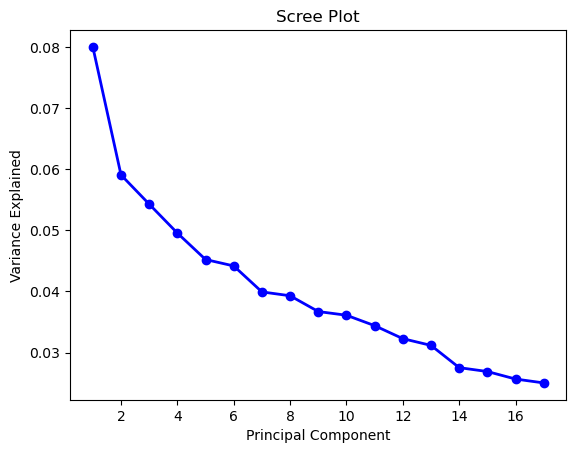

In [91]:
#scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [148]:
pca_coord = pd.concat([elite_df['Group'],
                       elite_df['TargetEmotion'],
                       pd.Series(principalComponents[:,0]),
                       pd.Series(principalComponents[:,1]),
                       pd.Series(principalComponents[:,2])], axis = 1)
HC_coord = pca_coord[pca_coord['Group']=='HC']
PT_coord = pca_coord[pca_coord['Group']=='PT']

2 components explain 13.908% of variance


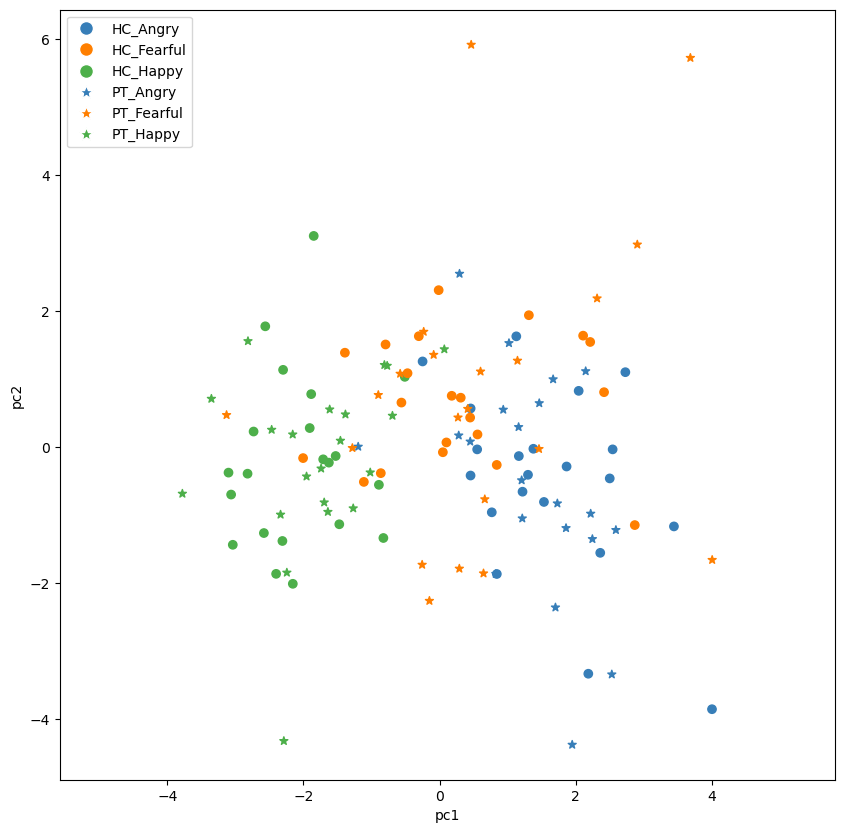

In [146]:
#visualise PCA in 2D

#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

#select top two principal components
print(f'2 components explain {sum(pca.explained_variance_ratio_[0:2])*100:.3f}% of variance')

plt.figure(figsize=(10,10))
plt.scatter(HC_coord[0], HC_coord[1], c=[color_dict[i] for i in HC_coord['TargetEmotion']])
plt.scatter(PT_coord[0], PT_coord[1], c=[color_dict[i] for i in PT_coord['TargetEmotion']], marker = '*')
plt.legend(loc = 'upper left',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='HC_Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='HC_Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='HC_Happy'),
                    Line2D([0], [0], marker='*', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='PT_Angry'),
                    Line2D([0], [0], marker='*', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='PT_Fearful'),
                    Line2D([0], [0], marker='*', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='PT_Happy')])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.axis('equal');

#add label for clinical group - vary by shape of point

3 components explain 19.337% of variance


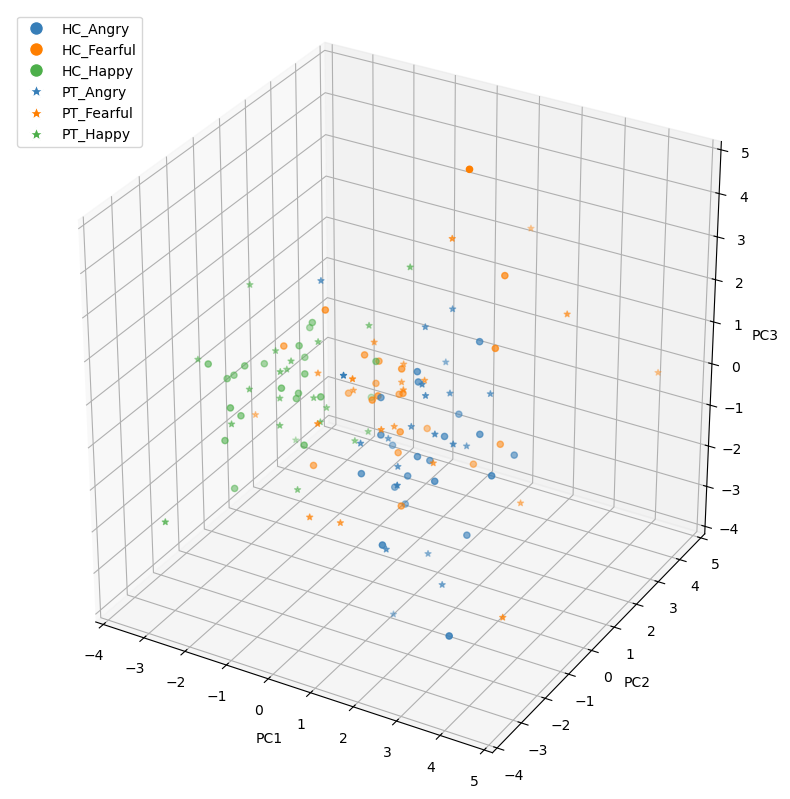

In [147]:
#visualise PCA in 3D
from mpl_toolkits.mplot3d import Axes3D

#assign color labels for each target emotion
color_dict = {'Angry':'#377eb8', 'Fearful':'#ff7f00', 'Happy':'#4daf4a'}

print(f'3 components explain {sum(pca.explained_variance_ratio_[0:3])*100:.3f}% of variance')

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(HC_coord[0], HC_coord[1], HC_coord[2], c=[color_dict[i] for i in HC_coord['TargetEmotion']])
ax.scatter(PT_coord[0], PT_coord[1], PT_coord[2], c=[color_dict[i] for i in PT_coord['TargetEmotion']], marker = '*')

plt.legend(loc = 'upper left',
           handles=[Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='HC_Angry'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='HC_Fearful'),
                    Line2D([0], [0], marker='o', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='HC_Happy'),
                    Line2D([0], [0], marker='*', color = 'w', markersize=10,
                           markerfacecolor='#377eb8', label='PT_Angry'),
                    Line2D([0], [0], marker='*', color = 'w', markersize=10,
                           markerfacecolor='#ff7f00', label='PT_Fearful'),
                    Line2D([0], [0], marker='*', color = 'w', markersize=10, 
                           markerfacecolor='#4daf4a', label='PT_Happy')])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_zlim3d(-4, 5)
ax.set_xlim3d(-4, 5)
ax.set_ylim3d(-4, 5)
ax.set_aspect('equal');

In [108]:
# Euclidean Distance from true neutral
dists = []
neutral = np.zeros((1,n_comp)).ravel() # vector of zeros
for i in np.arange(PC_df.shape[0]): # for each face
    comps = PC_df.iloc[i][comp_labels].values
    #dists = pd.concat([pd.Series(distance.euclidean(comps, neutral))], axis = 1)
    dists.append(distance.euclidean(comps, neutral)) # calculate distance
full_df = pd.concat([full_df, pd.Series(dists)], axis = 1) # add to dataframe
full_df.rename(columns={full_df.columns[-1]: "Neutral_euclidean_distance" }, inplace = True)  
#full_df['Neutral_euclidean_distance'] = full_df # add to dataframe
full_df

,neutral,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,rgtUprLipSk,lftLwrLipSk,rgtLwrLipSk,lftUprLipTgt,rgtUprLipTgt,lftLwrLipTgt,rgtLwrLipTgt,lftLipSealUpDn,rgtLipSealUpDn,lipSealLft,lipSealRgt,lftLipSealFwd,rgtLipSealFwd,lftLipSealBck,rgtLipSealBck,lftInrClsn,rgtInrClsn,lftOutClsn,rgtOutClsn,lftUprFnl,rgtUprFnl,lftLwrFnl,rgtLwrFnl,lftUprLipRas,rgtUprLipRas,lftNseWrnk,rgtNseWrnk,lftLwrLipDep,rgtLwrLipDep,lftNkTgt,rgtNkTgt,lftUprLipStr,rgtUprLipStr,lftLwrLipStr,rgtLwrLipStr,lftNrwMth,rgtNrwMth,lftMthStr,rgtMthStr,lftCnrPul,rgtCnrPul,lftDmplr,rgtDmplr,lftCnrDep,rgtCnrDep,lftCnrRas,rgtCnrRas,lftPufChk,rgtPufChk,lftPufLip,rgtPufLip,lftClnch,rgtClnch,swlo,lftNstrlFlr,rgtNstrlFlr,lftNstrlPnch,rgtNstrlPnch,lftInrBrwRas,rgtInrBrwRas,lftOutBrwRas,rgtOutBrwRas,lftBrwLwr,rgtBrwLwr,pcrs,lftSqnt,rgtSqnt,lftUprLidRas,rgtUprLidRas,lftUprLidDep,rgtUprLidDep,lftLwrLidRas,rgtLwrLidRas,lftLwrLidDep,rgtLwrLidDep,lftLwrLidTgt,rgtLwrLidTgt,lftEyeLft,rgtEyeLft,lftEyeRgt,rgtEyeRgt,lftEyeDwn,rgtEyeDwn,lftEyeUp,rgtEyeUp,lftChkRas,rgtChkRas,headBck,headFwd,headTltLft,headTltRgt,headTrnLft,headTrnRgt,lftLwrInrLipTeethClsn,lftLwrOutLipTeethClsn,rgtLwrInrLipTeethClsn,rgtLwrOutLipTeethClsn,chnRas_lftCnrPul_lftLwrFnl_lftLwrLipDep_lftMthStr,chnRas_rgtCnrPul_rgtLwrFnl_rgtLwrLipDep_rgtMthStr,chnRas_rgtLwrFnl,lftCnrPul_lftLwrFnl_lftLwrLipDep,lftCnrPul_lftLwrFnl_lftMthStr,lftCnrPul_lftLwrFnl,lftCnrPul_lftLwrLipDep_lftMthStr,lftCnrPul_lftLwrLipDep,lftCnrPul_lftMthStr,lftCnrPul_lftUprLipTgt,lftLwrFnl_lftLwrLipDep_lftMthStr,lftLwrFnl_lftLwrLipDep,lftLwrLipDep_lftMthStr,lftMthStr_lftLwrFnl,lftUprFnl_lftUprLipRas,rgtCnrPul_rgtLwrFnl,rgtCnrPul_rgtLwrFnl_rgtLwrLipDep,rgtCnrPul_rgtLwrFnl_rgtLwrLipDep_rgtMthStr,rgtCnrPul_rgtLwrFnl_rgtMthStr,rgtCnrPul_rgtLwrLipDep,rgtCnrPul_rgtMthStr,rgtCnrPul_rgtUprLipTgt,rgtLwrFnl_rgtLwrLipDep,rgtLwrFnl_rgtLwrLipDep_rgtMthStr,rgtLwrLipDep_rgtMthStr,rgtMthStr_rgtLwrFnl,rgtUprFnl_rgtUprLipRas,chnRas_lftLwrLipSk_lftInrClsn,chnRas_lftLwrLipSk,chnRas_rgtLwrLipSk,chnRas_rgtLwrLipSk_rgtInrClsn,jawBk_chnRas_lftLwrLipSk_lftLwrInrLipTeethClsn,jawBk_chnRas_rgtLwrLipSk_rgtLwrInrLipTeethClsn,jawBk_chnRas_lftLwrInrLipTeethClsn,jawBk_chnRas_rgtLwrInrLipTeethClsn,jawBk_lftLwrLipSk_lftLwrInrLipTeethClsn,jawBk_rgtLwrLipSk_rgtLwrInrLipTeethClsn,jawLft_jawBk_rgtLwrLipSk_rgtLwrOutLipTeethClsn,jawOpen_lftLwrLipSk,jawOpen_lftNrwMth,jawOpen_lftUprLipSk,jawOpen_rgtLwrLipSk,jawOpen_rgtNrwMth,jawOpen_rgtUprLipSk,jawRgt_jawBk_lftLwrLipSk_lftLwrOutLipTeethClsn,file,TargetEmotion,ID,Group,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Neutral_euclidean_distance
0,0,0.669160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.030642,0.033743,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285433,0.285433,0.989584,0.989584,0.000000,0.000000,0.000000,0.000000,0.071010,0.071010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102090,0.102090,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.682445,0.682445,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC08_Angry_output_1_parsed.csv,Angry,S1HC08,HC,-0.249353,1.260474,-1.574597,0.110204,-0.415073,-1.537587,-1.874881,-0.466974,1.934164,-1.513991,-0.252168,-0.943326,0.276077,-0.403507,-2.716426,-1.249342,1.904453,5.495870
1,0,0.175359,0.059658,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,

In [109]:
# Cosine Distance from true neutral
dists = []
neutral = 1e-12*np.ones((1,n_comp)).ravel() # vector of zeros (small epsilon in order to avoid division by zero error for cosine distance)
for i in np.arange(PC_df.shape[0]): # for each face
    comps = PC_df.iloc[i][comp_labels].values
    dists.append(distance.cosine(comps, neutral)) # calculate distance
full_df['Neutral_cosine_distance'] = dists # add to dataframe

In [110]:
#%% Euclidean distance from Centroid

# average principal components
angry_mean_PC   = np.mean(full_df[full_df['TargetEmotion']=='Angry'][comp_labels].values, axis = 0)
fearful_mean_PC = np.mean(full_df[full_df['TargetEmotion']=='Fearful'][comp_labels].values, axis = 0)
happy_mean_PC     = np.mean(full_df[full_df['TargetEmotion']=='Happy'][comp_labels].values, axis = 0)

# Loop through dataframe
distances = []
for i in full_df.index:
    PCs = full_df.iloc[i][comp_labels].values
    if full_df.iloc[i]['TargetEmotion'] == 'Angry':
        dist = distance.euclidean(PCs, angry_mean_PC)
    elif full_df.iloc[i]['TargetEmotion'] == 'Fearful':
        dist = distance.euclidean(PCs, fearful_mean_PC)
    elif full_df.iloc[i]['TargetEmotion'] == 'Happy':
        dist = distance.euclidean(PCs, happy_mean_PC)
    
    distances.append(dist)
full_df['Centroid_euclidean_distance'] = distances


In [111]:
#%% Cosine distance from Centroid

# average principal components
angry_mean_PC   = np.mean(full_df[full_df['TargetEmotion']=='Angry'][comp_labels].values, axis = 0)
fearful_mean_PC = np.mean(full_df[full_df['TargetEmotion']=='Fearful'][comp_labels].values, axis = 0)
happy_mean_PC     = np.mean(full_df[full_df['TargetEmotion']=='Happy'][comp_labels].values, axis = 0)

# Loop through dataframe
distances = []
for i in full_df.index:
    PCs = full_df.iloc[i][comp_labels].values
    if full_df.iloc[i]['TargetEmotion'] == 'Angry':
        dist = distance.cosine(PCs, angry_mean_PC)
    elif full_df.iloc[i]['TargetEmotion'] == 'Fearful':
        dist = distance.cosine(PCs, fearful_mean_PC)
    elif full_df.iloc[i]['TargetEmotion'] == 'Happy':
        dist = distance.cosine(PCs, happy_mean_PC)
    
    distances.append(dist)
full_df['Centroid_cosine_distance'] = distances

In [112]:
full_df.to_csv('processed_data/all_elite_distances.csv')
full_df

,neutral,jawLft,jawRgt,jawFwd,jawBk,chnRas,lftUprLipSk,rgtUprLipSk,lftLwrLipSk,rgtLwrLipSk,lftUprLipTgt,rgtUprLipTgt,lftLwrLipTgt,rgtLwrLipTgt,lftLipSealUpDn,rgtLipSealUpDn,lipSealLft,lipSealRgt,lftLipSealFwd,rgtLipSealFwd,lftLipSealBck,rgtLipSealBck,lftInrClsn,rgtInrClsn,lftOutClsn,rgtOutClsn,lftUprFnl,rgtUprFnl,lftLwrFnl,rgtLwrFnl,lftUprLipRas,rgtUprLipRas,lftNseWrnk,rgtNseWrnk,lftLwrLipDep,rgtLwrLipDep,lftNkTgt,rgtNkTgt,lftUprLipStr,rgtUprLipStr,lftLwrLipStr,rgtLwrLipStr,lftNrwMth,rgtNrwMth,lftMthStr,rgtMthStr,lftCnrPul,rgtCnrPul,lftDmplr,rgtDmplr,lftCnrDep,rgtCnrDep,lftCnrRas,rgtCnrRas,lftPufChk,rgtPufChk,lftPufLip,rgtPufLip,lftClnch,rgtClnch,swlo,lftNstrlFlr,rgtNstrlFlr,lftNstrlPnch,rgtNstrlPnch,lftInrBrwRas,rgtInrBrwRas,lftOutBrwRas,rgtOutBrwRas,lftBrwLwr,rgtBrwLwr,pcrs,lftSqnt,rgtSqnt,lftUprLidRas,rgtUprLidRas,lftUprLidDep,rgtUprLidDep,lftLwrLidRas,rgtLwrLidRas,lftLwrLidDep,rgtLwrLidDep,lftLwrLidTgt,rgtLwrLidTgt,lftEyeLft,rgtEyeLft,lftEyeRgt,rgtEyeRgt,lftEyeDwn,rgtEyeDwn,lftEyeUp,rgtEyeUp,lftChkRas,rgtChkRas,headBck,headFwd,headTltLft,headTltRgt,headTrnLft,headTrnRgt,lftLwrInrLipTeethClsn,lftLwrOutLipTeethClsn,rgtLwrInrLipTeethClsn,rgtLwrOutLipTeethClsn,chnRas_lftCnrPul_lftLwrFnl_lftLwrLipDep_lftMthStr,chnRas_rgtCnrPul_rgtLwrFnl_rgtLwrLipDep_rgtMthStr,chnRas_rgtLwrFnl,lftCnrPul_lftLwrFnl_lftLwrLipDep,lftCnrPul_lftLwrFnl_lftMthStr,lftCnrPul_lftLwrFnl,lftCnrPul_lftLwrLipDep_lftMthStr,lftCnrPul_lftLwrLipDep,lftCnrPul_lftMthStr,lftCnrPul_lftUprLipTgt,lftLwrFnl_lftLwrLipDep_lftMthStr,lftLwrFnl_lftLwrLipDep,lftLwrLipDep_lftMthStr,lftMthStr_lftLwrFnl,lftUprFnl_lftUprLipRas,rgtCnrPul_rgtLwrFnl,rgtCnrPul_rgtLwrFnl_rgtLwrLipDep,rgtCnrPul_rgtLwrFnl_rgtLwrLipDep_rgtMthStr,rgtCnrPul_rgtLwrFnl_rgtMthStr,rgtCnrPul_rgtLwrLipDep,rgtCnrPul_rgtMthStr,rgtCnrPul_rgtUprLipTgt,rgtLwrFnl_rgtLwrLipDep,rgtLwrFnl_rgtLwrLipDep_rgtMthStr,rgtLwrLipDep_rgtMthStr,rgtMthStr_rgtLwrFnl,rgtUprFnl_rgtUprLipRas,chnRas_lftLwrLipSk_lftInrClsn,chnRas_lftLwrLipSk,chnRas_rgtLwrLipSk,chnRas_rgtLwrLipSk_rgtInrClsn,jawBk_chnRas_lftLwrLipSk_lftLwrInrLipTeethClsn,jawBk_chnRas_rgtLwrLipSk_rgtLwrInrLipTeethClsn,jawBk_chnRas_lftLwrInrLipTeethClsn,jawBk_chnRas_rgtLwrInrLipTeethClsn,jawBk_lftLwrLipSk_lftLwrInrLipTeethClsn,jawBk_rgtLwrLipSk_rgtLwrInrLipTeethClsn,jawLft_jawBk_rgtLwrLipSk_rgtLwrOutLipTeethClsn,jawOpen_lftLwrLipSk,jawOpen_lftNrwMth,jawOpen_lftUprLipSk,jawOpen_rgtLwrLipSk,jawOpen_rgtNrwMth,jawOpen_rgtUprLipSk,jawRgt_jawBk_lftLwrLipSk_lftLwrOutLipTeethClsn,file,TargetEmotion,ID,Group,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Neutral_euclidean_distance,Neutral_cosine_distance,Centroid_euclidean_distance,Centroid_cosine_distance
0,0,0.669160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.030642,0.033743,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285433,0.285433,0.989584,0.989584,0.000000,0.000000,0.000000,0.000000,0.071010,0.071010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102090,0.102090,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.682445,0.682445,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,S1HC08_Angry_output_1_parsed.csv,Angry,S1HC08,HC,-0.249353,1.260474,-1.574597,0.110204,-0.415073,-1.537587,-1.874881,-0.466974,1.934164,-1.513991,-0.252168,-0.943326,0.276077,-0.403507,-2.716426,-1.249342,1.904453,5.495870,1.340328,5.732407,0.979325
1,0,0.175359,0.059658,0.000000,0.000000,0.0,0.

In [113]:
#calculate mean for each emotion for each group
avg_elite_dist = full_df.drop(['file', 
                               'ID'], axis=1).groupby(['Group', 
                                                       'TargetEmotion'], 
                                                      observed=True).agg({'Neutral_euclidean_distance':['mean', 'std'],
                                                                          'Centroid_euclidean_distance':['mean', 'std'],
                                                                          'Neutral_cosine_distance':['mean', 'std'],
                                                                          'Centroid_cosine_distance':['mean', 'std']})

avg_elite_dist.to_csv('processed_data/average_elite_distances.csv')

avg_elite_dist

Neutral_euclidean_distance            \
                                          mean       std   
Group TargetEmotion                                        
HC    Angry                           4.897951  1.362947   
      Fearful                         5.199611  1.896123   
      Happy                           4.410460  1.466094   
PT    Angry                           5.501587  1.776392   
      Fearful                         5.490504  2.063093   
      Happy                           4.651429  1.537054   

                    Centroid_euclidean_distance            \
                                           mean       std   
Group TargetEmotion                                         
HC    Angry                            4.552008  1.273096   
      Fearful                          5.013659  1.865515   
      Happy                            3.831426  1.519428   
PT    Angry                            5.247667  1.810990   
      Fearful                          5.387122  1.951652   
      Happy                            4.213026  1.611772   

                    Neutral_cosine_distance            \
                                       mean       std   
Group TargetEmotion                                     
HC    Angry                        1.011814  0.237438   
      Fearful                      0.919022  0.183522   
      Happy                        1.191899  0.204510   
PT    Angry                        1.071265  0.206817   
      Fearful                      0.827325  0.193012   
      Happy                        1.115668  0.229155   

                    Centroid_cosine_distance            
                                        mean       std  
Group TargetEmotion                                     
HC    Angry                         0.620501  0.148162  
      Fearful                       0.721957  0.125850  
      Happy                         0.484293  0.175090  
PT    Angry                         0.684413  0.189014  
      Fearful                       0.792468  0.230073  
      Happy                         0.569055  0.210617